## Lesson 1

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)


In [3]:
#importing data
data = pd.read_csv('files_for_activities/unit4.csv') # this file is in files_for_lesson_and_activities folder
data.head()


,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865


In [4]:
data.shape

(90569, 28)

In [5]:
# Checking for null values
nulls = pd.DataFrame(data.isna().sum()/len(data))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
7,INCOME,0.222847
26,TIMELAG,0.106582
0,STATE,0.000000
15,IC3,0.000000
25,NGIFTALL,0.000000
24,RFA_2,0.000000
23,MAXADATE,0.000000
22,NUMPRM12,0.000000
21,CARDPM12,0.000000
20,CARDPROM,0.000000


In [6]:
# Check the numerical variables
numericals = data.select_dtypes(np.number)
numericals.head()

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
0,3712,NaN,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,31,4.0,7.741935
1,5202,6.0,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,3,18.0,15.666667
2,0,3.0,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,27,12.0,7.481481
3,2801,1.0,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,16,9.0,6.812500
4,2001,3.0,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,37,14.0,6.864865


The INCOME might be an important factor in predicting the gift value, so even though it has a lot of null values, we will not drop the column.
In this exercise, we will try a more precise method to replace the null values, instead of simply replacing them by a constant value, mean or median.
We will use a similar method for the column TIMELAG .

<Axes: >

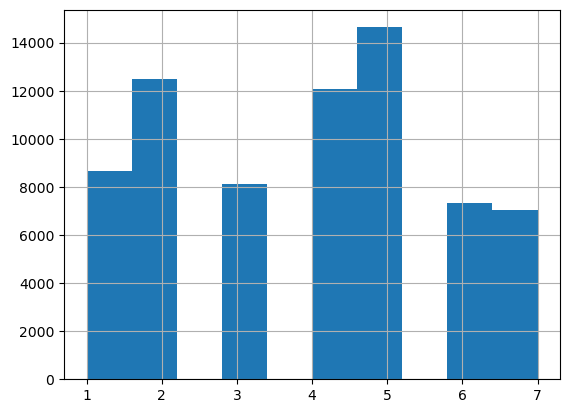

In [7]:
# working with INCOME column EDA + Data cleaning
data['INCOME'].hist()


Looking at the histogram, we can see we need to replace the missing values first.
In the previous lessons, we talked about replacing null values with mean and median and some other constant value. In the later lessons, we will look at methods different than filling with constants (mean and median).

## Lesson 2

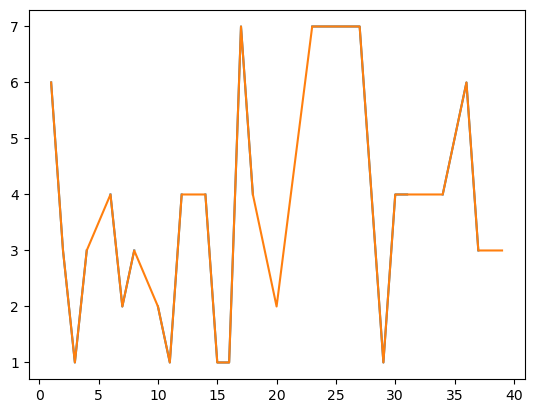

In [8]:
# How interpolation works
data['INCOME'][0:40].plot()  # To check how interpolation would fill the missing values
new_income_data = data['INCOME'][0:40].interpolate(method='linear')

#new_income_data = data['INCOME'][0:40].interpolate(method='akima')  # Other methods that can be used
#new_income_data = data['INCOME'][0:40].interpolate(method='polynomial', order=3)  # Other methods that can be used
new_income_data.plot()
plt.show()


<Axes: xlabel='INCOME', ylabel='Density'>

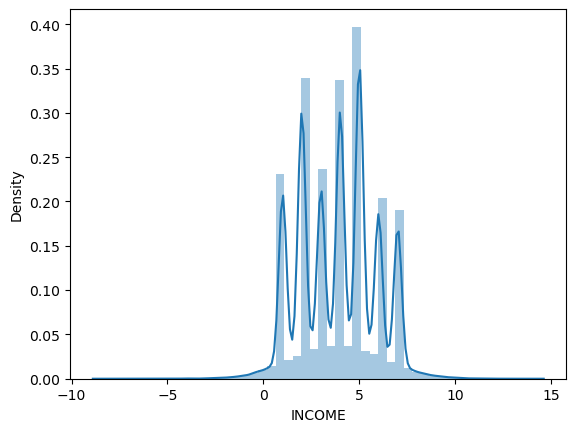

In [9]:
# Test what does the distribution look like after we have used interpolation method
points = data['INCOME'].interpolate(method='polynomial', order=3)
sns.distplot(points[1:])   # We are using the index __1:__ as first value was NaN

It is important to compare the results with other methods and then choose the best one.

<Axes: xlabel='INCOME', ylabel='Density'>

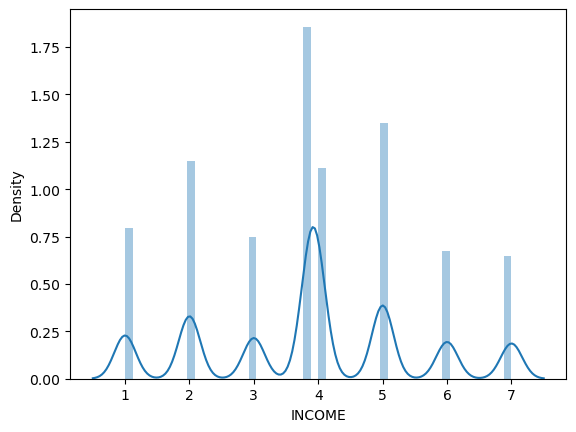

In [10]:
# Testing interpolation method with mean and median methods
points2 = data['INCOME'].fillna(np.mean(data['INCOME']))
sns.distplot(points2)

<Axes: xlabel='INCOME', ylabel='Density'>

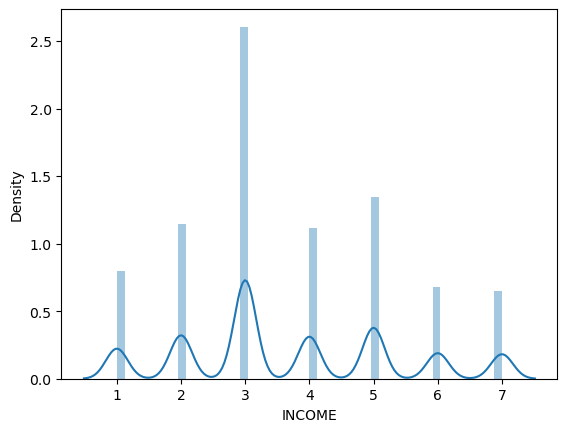

In [11]:
# Note that unlike "np.mean()" , "np.median()" doesn't work if there are any null values in the column
median = np.median(data['INCOME'].fillna(0))

points3 = data['INCOME'].fillna(median)
sns.distplot(points3)


In [12]:
# Finally choosing mean method
data['INCOME'] = data['INCOME'].fillna(np.mean(data['INCOME']))

## Lesson 3

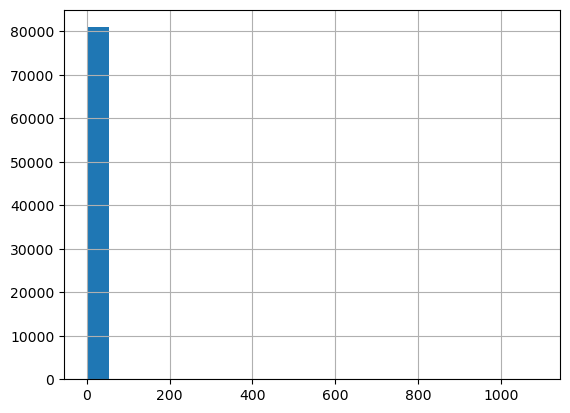

In [13]:
# Working with INCOME column EDA + Data cleaning
data['TIMELAG'].hist(bins=20)
plt.show()

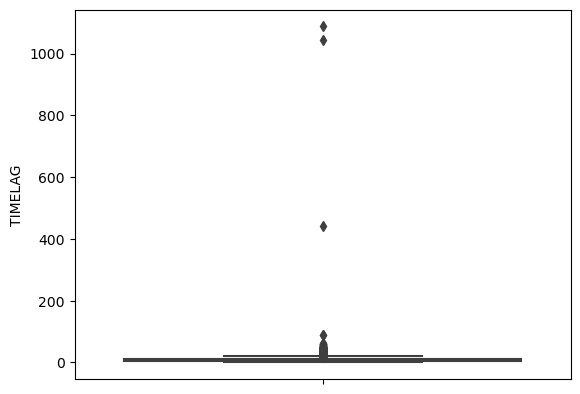

In [14]:
sns.boxplot(y=data['TIMELAG'])
plt.show()

Data in the Timelag column is highly skewed (positive skewness).
Removing outliers straight away might not be the best idea as it would remove a lot of data points from the data.
We will try some transformations.


In [15]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

In [16]:
def sqrt_transfom_clean_(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later


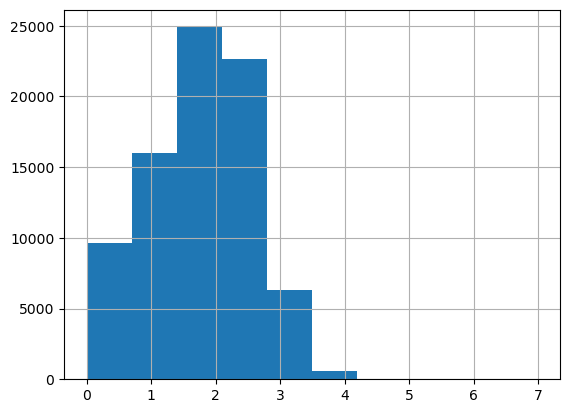

In [17]:
# Using the functions to check the distribution of transformed data
pd.Series(map(log_transfom_clean_, data['TIMELAG'])).hist()
plt.show()

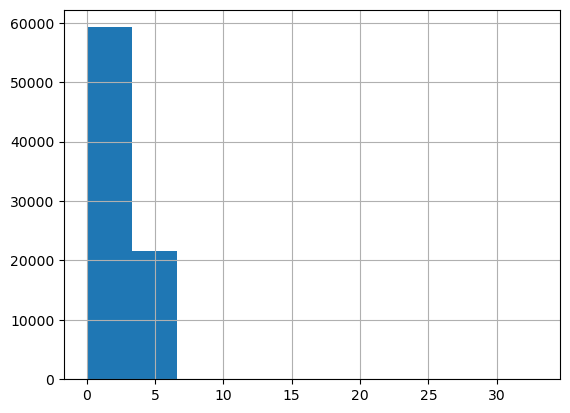

In [18]:
pd.Series(map(sqrt_transfom_clean_, data['TIMELAG'])).hist()
plt.show()


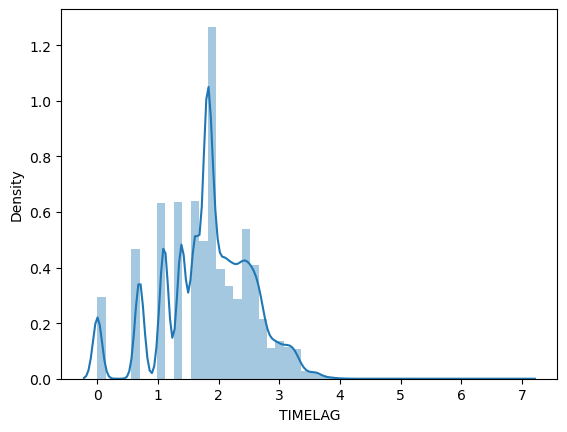

In [19]:
# Use log transformation to replace the values of the column now
data['TIMELAG'] = list(map(log_transfom_clean_, data['TIMELAG']))
data['TIMELAG'] = data['TIMELAG'].fillna(np.mean(data['TIMELAG']))
sns.distplot(data['TIMELAG'])
plt.show()

## Lesson 4
Even after using the transformation, there is still some skewness in the column TIMELAG . We will remove the outliers only from the right side of the distribution plot.


In [20]:
# Checking how many values will be removed if the outliers are removed
iqr = np.percentile(data['TIMELAG'],75) - np.percentile(data['TIMELAG'],25)
upper_limit = np.percentile(data['TIMELAG'],75) + 1.5*iqr
print(upper_limit)

3.677021190805279


In [21]:
new_df = data[data['TIMELAG'] > upper_limit]
len(new_df)  # THis checks the number of points that will be removed

146

In [22]:
new_df

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
582,MS,,3401,XXXX,,M,R3,3.000000,H,310,323,1,0,141,170,180,204,5277,,37,14,4,10,9702,L2F,4,3.737670,10.750000
633,TX,,4401,XXXX,,F,C3,5.000000,U,488,603,3,2,280,224,295,307,8828,Y,40,15,4,9,9702,L1F,3,3.891820,12.000000
1013,MN,,6401,XXXX,,F,S1,5.000000,H,1215,1275,2,3,548,571,587,629,21362,,53,20,6,13,9702,L2F,7,4.127134,16.428571
2232,MT,,3701,XXXX,X,M,R2,5.000000,H,768,808,2,2,304,402,370,435,12793,,107,39,11,27,9702,L2F,37,3.784190,9.729730
2867,NV,,2501,XXXX,,M,S1,3.000000,H,1343,1513,9,7,493,512,530,543,18214,Y,62,24,4,11,9702,L2E,12,3.828641,5.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87820,CA,,0,XXXX,,F,S2,3.878257,,2449,2522,7,7,464,472,518,519,19318,,52,26,6,11,9702,L4D,15,3.784190,5.533333
88460,NC,,0,XXXX,,F,T2,3.878257,,690,762,4,3,303,335,308,332,12186,,36,15,6,13,9702,L4E,7,3.784190,7.571429
88947,MT,,4206,XXXX,,M,R1,4.000000,H,862,922,4,2,329,370,386,437,20757,,39,16,6,13,9702,L2G,4,3.761200,21.250000
89045,MI,,1907,XXXX,,M,C2,5.000000,H,389,399,3,3,349,379,371,411,12908,,119,29,9,36,9702,L3G,48,6.992096,18.083333


In [23]:
# Using filters
points = list(filter(lambda x: x < upper_limit, data['TIMELAG']))
len(points)

90423

In [24]:
## some other simple applications of filter

lst = [0,1,2,3,4,5,6,7,8,9,10]
list(filter(lambda x: x % 2 == 0, lst))


[0, 2, 4, 6, 8, 10]

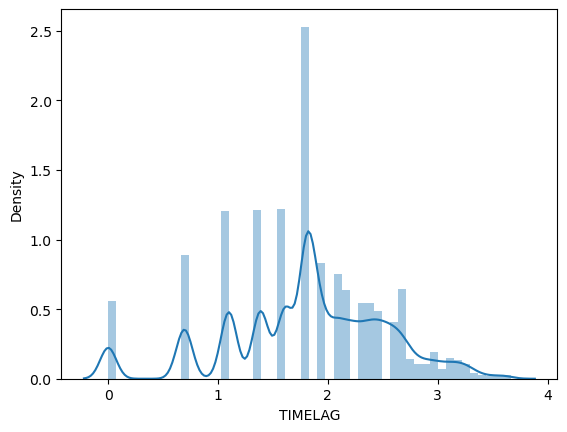

In [25]:
# Removing outliers
data = data[data['TIMELAG'] < upper_limit]
sns.distplot(data['TIMELAG'])
plt.show()